### 3_Assignment

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

#### Tasks

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in `medical_data_visualizer.py`:
* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.tail()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [58]:
# https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o
# Add 'overweight' column
# df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)
# df["overweight"] = [1 if (df["BMI"] >25) else 0] # cannot use this
def check_overweight(x):
    BMI = x["weight"] / ((x["height"] / 100) ** 2)
    return 1 if BMI > 25 else 0
df["overweight"] = df.apply(check_overweight, axis = 1)
# df["overweight"] =  np.where(df["BMI"] >25, 1, 0) # alt, OK



In [59]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
# def normalize_data(x):
#     if x == 1:
#         return 0
#     elif x > 1:
#         return 1
#     else:
#         return x


df["cholesterol"] = [0 if x == 1 else 1 for x in df["cholesterol"]]
df["gluc"] = [0 if x ==1 else 1 for x in df["gluc"]]

df.tail()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,1,0,0,0,1,0,0


In [60]:
# Draw Categorical Plot
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# df_cat = pd.melt(df,  id_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [61]:
# direct solution by sns count magic
# df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')
# fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")

In [62]:
# https://www.kaggle.com/benthecoder/fcc-medical-data-visualization
# https://www.datacamp.com/community/tutorials/pandas-multi-index
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = (
    pd.DataFrame(df_cat.groupby(["variable", "value", "cardio"])["value"].count())
    .rename(columns={"value": "total"})
    .reset_index()
)
df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


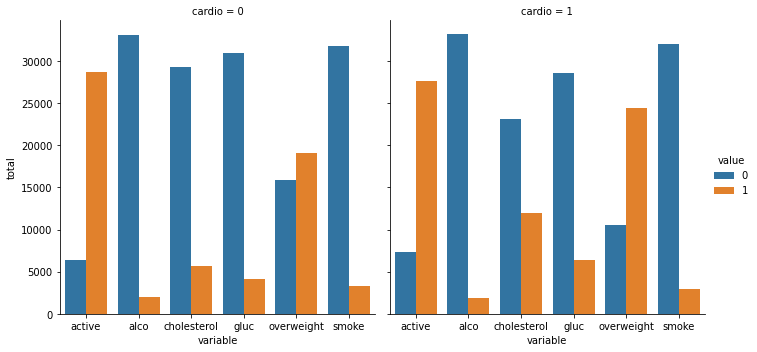

In [63]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="bar",  x="variable",y= "total",hue="value", col="cardio").set_axis_labels("variable", "total")


In [ ]:
# Do not modify the next two lines
fig.savefig('catplot.png')

* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile

In [64]:
# Draw Heat Map
# Clean the data
# df_heat = df[
#      (df['height'] >= df['height'].quantile(0.025))
# ]
df_heat = df[
    (df['ap_lo'] <= df['ap_hi'])
    & (df['height'] >= df['height'].quantile(0.025))
    & (df['height'] <= df['height'].quantile(0.975))
    & (df['weight'] >= df['weight'].quantile(0.025))
    & (df['weight'] <= df['weight'].quantile(0.975))
]
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [65]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [66]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask = np.triu(corr)

mask




array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<AxesSubplot:>

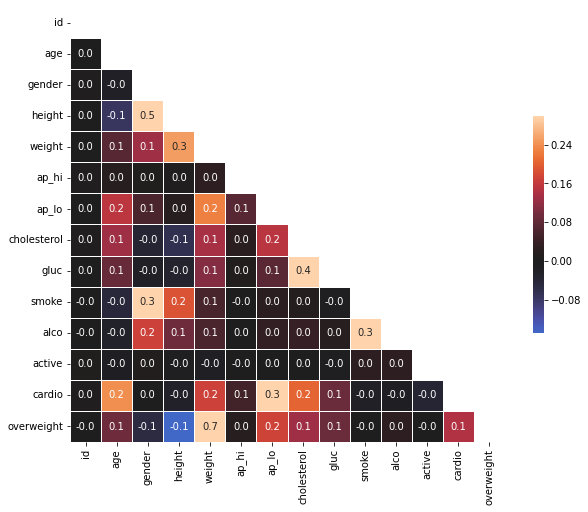

In [102]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
# sns.heatmap(corr, mask=mask,  vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(
    corr,
    mask=mask,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    annot = True,
    fmt= ".1f",
    cbar_kws={"shrink": 0.5 , "ticks": np.arange(-0.08, 0.25, 0.08)},
)


In [ ]:
# Do not modify the next two lines
fig.savefig("heatmap.png")